Lambda School Data Science

---

# Logistic Regression


## Assignment 🌯

Using a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/), build a model that predicts whether a burrito is rated `'Great'`?

## What We Want

*Associate Instructor* is a teaching position where you will work closely students — delivering curriculum, and leading question and answer sessions. The purpose of this assignment is to give us an idea of how you approach data science problems and whether you can explain that approach to someone who does not yet have your level of expertise. Given this, we are less interested you building a "perfect" model and more focused on how you use this assignment to teach important concepts to a data science student.

## What You Need to Do

- [ ] Make a copy of this notebook to work on - you can download if you have a local Jupyter setup, or click `File > Save a copy in Drive` to copy and work on with Google Colab
- [ ] Import the burrito `csv` file into a `DataFrame`. Your target will be the `'Great'` column.
- [ ] Conduct exploratory data analysis (EDA) to determine how you should clean the data for your pipeline.
- [ ] Clean your data. (Note: You are not required to use all columns in your model, but justify your decisions based on your EDA.)
- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Determine what the baseline accuracy is for a naïve classification model.
- [ ] Create a `scikit-learn` pipeline with the following components:
  - A one hot encoder for categorical features.
  - A scaler.
  - A logistic regressor.
- [ ] Train your model using the training data.
- [ ] Create a visualization showing your model's coefficients.
- [ ] Get your model's validation accuracy (multiple times if you try multiple iterations).
- [ ] Get your model's test accuracy (one time, at the end).

---

### Import the burrito `csv` file

In [1]:
# Import Data
import pandas as pd
pd.set_option('display.max_rows', 500)
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1cctPq1sYeD6Y6mGg5Lpl-GLDJBwtdihg')
print("Table dimensions:", df.shape)
df.head(10)

Table dimensions: (421, 65)


,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Reviewer,Notes,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,3.0,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,Scott,good fries: 4/5,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,3.5,NaN,NaN,NaN,NaN,NaN,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,Scott,Fries: 3/5; too little meat,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,1.5,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,Emily,NaN,NaN,NaN,NaN,x,x,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,Ricardo,Go to average burrito place like Rigoberto's i...,NaN,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,4.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,Scott,NaN,NaN,NaN,x,x,NaN,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
5,Pollos Maria,combo chicken,1/28/2016,NaN,NaN,NaN,NaN,NaN,NaN,6.99,4.0,NaN,NaN,NaN,NaN,NaN,3.0,4.0,5.0,3.5,2.5,2.5,2.5,4.0,1.0,Emily,NaN,NaN,NaN,NaN,NaN,x,x,NaN,x,NaN,x,NaN,NaN,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6,Nico's Taco Shop,California,1/30/2016,Carmel Valley,3860 Valley Centre Dr #404,http://www.yelp.com/biz/nicos-taco-shop-san-diego,3.0,2.9,NaN,7.19,1.5,NaN,NaN,NaN,NaN,NaN,2.0,3.0,3.0,2.0,2.5,2.5,NaN,2.0,3.0,Scott,not fries. big potatoes,NaN,NaN,x,NaN,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
7,Nico's Taco Shop,Carnitas,1/30/2016,NaN,NaN,NaN,NaN,NaN,NaN,6.99,4.0,NaN,NaN,NaN,NaN,NaN,2.5,3.0,3.0,2.5,3.0,3.5,NaN,2.5,3.0,Emily,NaN,NaN,NaN,NaN,x,x,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8,Los Primos Mexican Food,Monster California,2/1/2016,UTC,7770 Regents Rd,http://www.primosmex.com/,3.0,3.7,x,9.25,3.5,NaN,NaN,NaN,NaN,NaN,2.0,4.5,4.5,3.5,1.5,3.0,3.5,4.0,2.0,Scott,this tasted really bad leftover. not included ...,NaN,NaN,x,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9,JV's Mexican Food,Carne Asada,2/6/2016,Morena,1112 Morena Blvd,http://jvsmexfood.com/,4.0,4.1,NaN,6.25,3.5,NaN,NaN,NaN,NaN,NaN,2.5,1.5,1.5,3.0,4.5,3.0,1.5,2.0,4.5,Scott,NaN,NaN,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


### Conduct exploratory data analysis (EDA)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


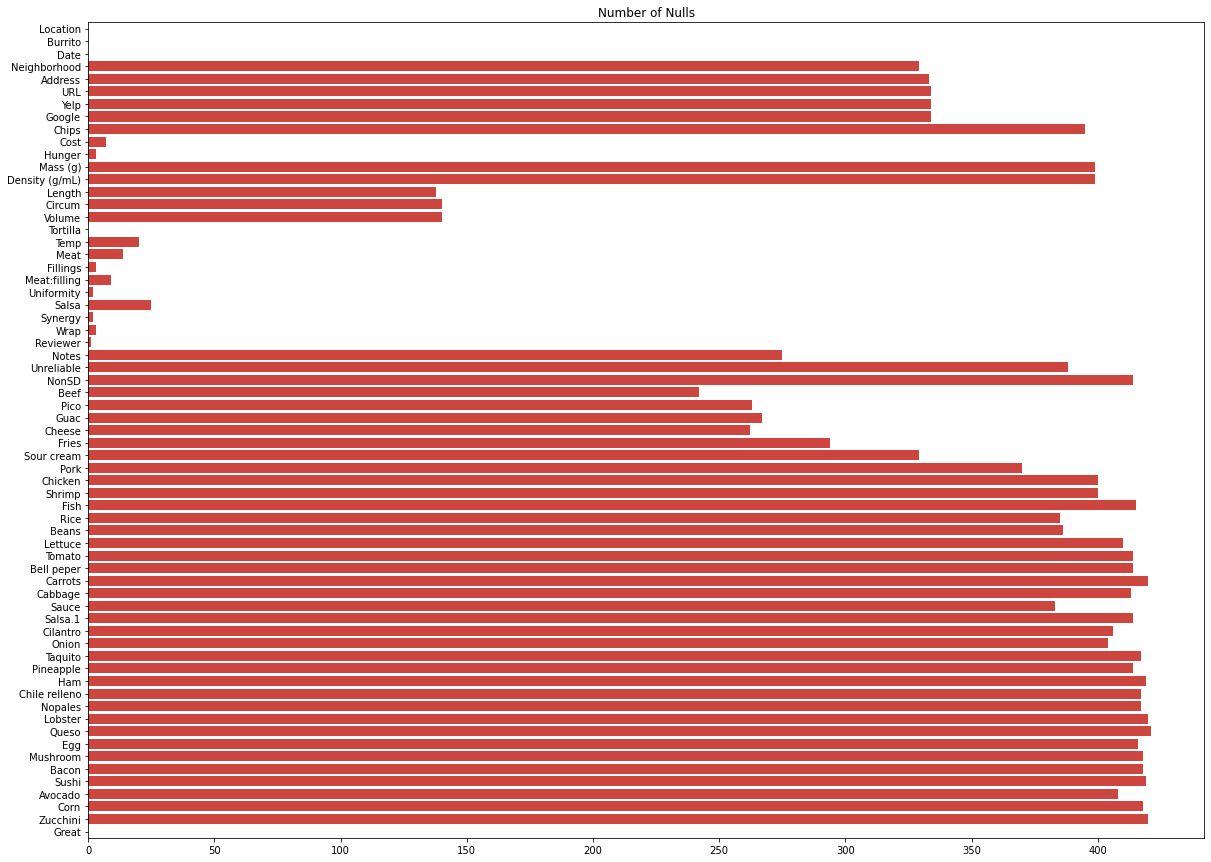

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
chart = sns.barplot(x=df.isnull().sum(), y=df.columns, palette=sns.color_palette("Reds_d", n_colors=1, desat=1), )
# chart.set_xticklabels(labels=df.columns, rotation=90)
plt.title("Number of Nulls")
ax=chart
#annotate axis = seaborn axis
# for p in ax.patches:
#              ax.annotate("%.2f" % p.get_height(), (p.get_y() + p.get_width() / 2., p.get_height()),
#                  ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
#                  textcoords='offset points')
plt.show()

### **Many sparse predictors!**

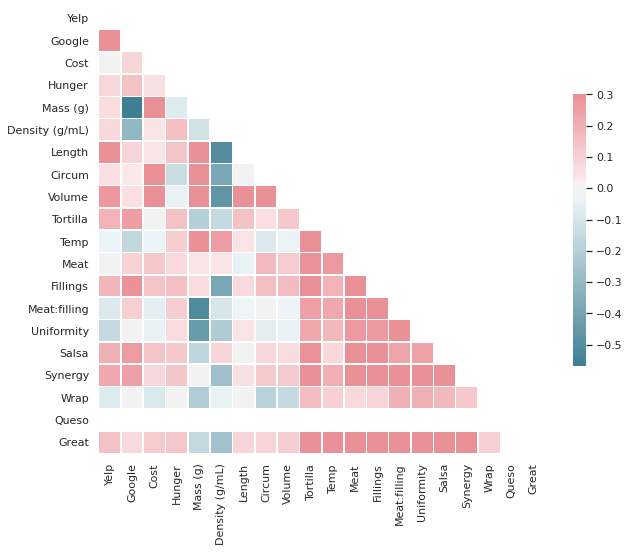

In [3]:
# Plot correlation matrix and pairplot

import numpy as np
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                  columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))
plt.figure(figsize=(10,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

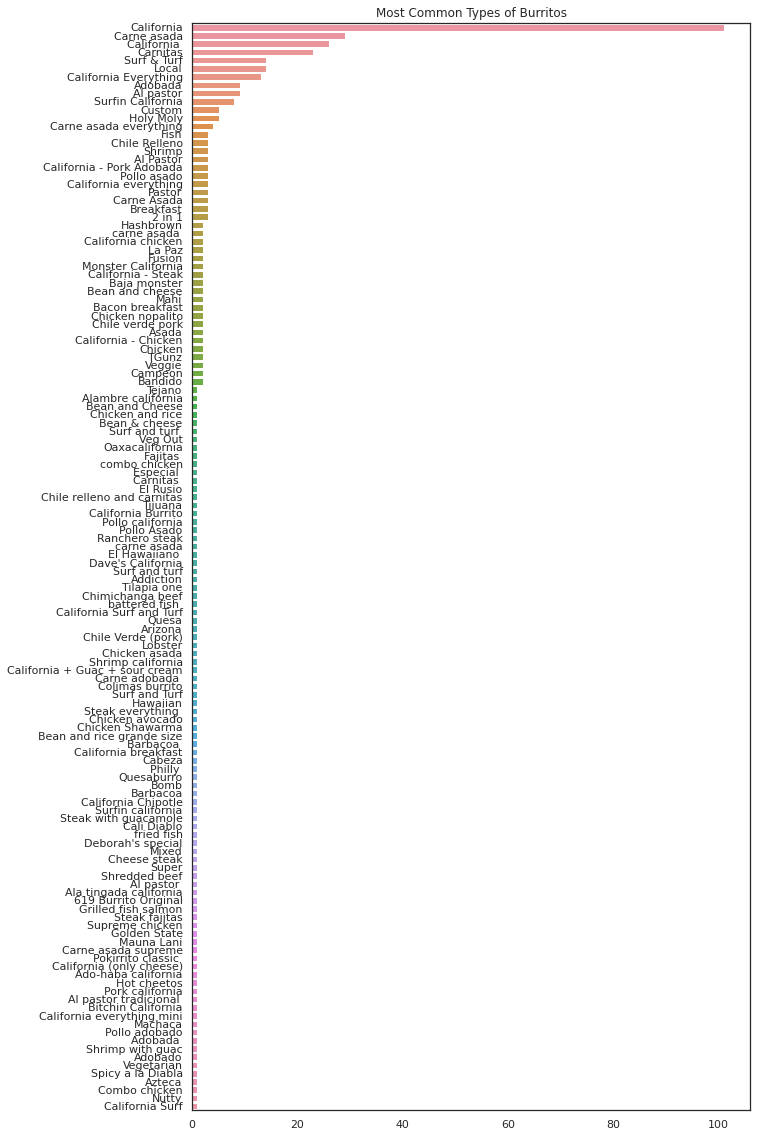

In [4]:
plt.figure(figsize=(10,20))
sns.barplot(y=df.Burrito.value_counts().index, x = df.Burrito.value_counts().values)
plt.title("Most Common Types of Burritos")
plt.show()

In [5]:
print("What's the split on target feature?")
df.Great.value_counts()

What's the split on target feature?


False    239
True     182
Name: Great, dtype: int64

In [6]:
for c in df.select_dtypes(include=[int, float]).columns:
  print(c,"Max:", df.select_dtypes(include=[int, float])[c].max(), c+" Min.", df.select_dtypes(include=[int, float])[c].min())

Yelp Max: 4.5 Yelp Min. 2.5
Google Max: 5.0 Google Min. 2.9
Cost Max: 25.0 Cost Min. 2.99
Hunger Max: 5.0 Hunger Min. 0.5
Mass (g) Max: 925.0 Mass (g) Min. 350.0
Density (g/mL) Max: 0.8656716418000001 Density (g/mL) Min. 0.56
Length Max: 26.0 Length Min. 15.0
Circum Max: 29.0 Circum Min. 17.0
Volume Max: 1.54 Volume Min. 0.4
Tortilla Max: 5.0 Tortilla Min. 1.0
Temp Max: 5.0 Temp Min. 1.0
Meat Max: 5.0 Meat Min. 1.0
Fillings Max: 5.0 Fillings Min. 1.0
Meat:filling Max: 5.0 Meat:filling Min. 0.5
Uniformity Max: 5.0 Uniformity Min. 0.0
Salsa Max: 5.0 Salsa Min. 0.0
Synergy Max: 5.0 Synergy Min. 1.0
Wrap Max: 5.0 Wrap Min. 0.0
Queso Max: nan Queso Min. nan


### **We see different ranges with the numerical values and will hence need to scale!**

### Clean data

In [7]:
df['Burrito'] = df['Burrito'].str.lower()

california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

# ohe = OneHotEncoder(sparse=False)
# ohe.fit_transform(np.array(df.Burrito).reshape(-1, 1))


### Do train/validate/test split

In [8]:
train_columns = ['Yelp', 'Google', 'Cost', 'Hunger', 'Mass (g)', 'Density (g/mL)',
       'Length', 'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings',
       'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap']#, 'Queso']#.select_dtypes(include=[int,float]).columns

from sklearn.model_selection import train_test_split

# Train Test Split
X = df[train_columns]
y = df.Great

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train = X_train.apply(lambda x: x.fillna(x.mean()),axis=0)

X_test = X_test.apply(lambda x: x.fillna(x.mean()),axis=0)

# Split Validation set from train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


In [9]:
X_train.columns

Index(['Yelp', 'Google', 'Cost', 'Hunger', 'Mass (g)', 'Density (g/mL)',
       'Length', 'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings',
       'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap'],
      dtype='object')

### Determine baseline accuracy for a naïve classification model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

y_pred = logmodel.predict(X_test)
from sklearn.metrics import classification_report
# print(classification_report(y_test,y_pred))
print("Accuracy is ", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n\n")

# print("Classification Report: \n", metrics.classification_report(y_test,y_pred))

print("Confusion Matrix", metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Accuracy is  0.8588235294117647 


Confusion Matrix [[52  2]
 [10 21]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Create a `scikit-learn` pipeline

In [11]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

np.random.seed(0)

train_columns = ["Burrito", 'Yelp', 'Google', 'Cost', 'Hunger', 'Mass (g)', 'Density (g/mL)',
       'Length', 'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings',
       'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap']#, 'Queso']#.select_dtypes(include=[int,float]).columns

numerical_features = ['Yelp', 'Google', 'Cost', 'Hunger', 'Mass (g)', 'Density (g/mL)',
       'Length', 'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings',
       'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap']

categorical_features = ["Burrito"]
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import sklearn.metrics

# Train Test Split
X = df[train_columns]
y = df.Great

In [12]:
# df['Burrito'] = df['Burrito'].str.lower()

# california = df['Burrito'].str.contains('california')
# asada = df['Burrito'].str.contains('asada')
# surf = df['Burrito'].str.contains('surf')
# carnitas = df['Burrito'].str.contains('carnitas')

# df.loc[california, 'Burrito'] = 'California'
# df.loc[asada, 'Burrito'] = 'Asada'
# df.loc[surf, 'Burrito'] = 'Surf & Turf'
# df.loc[carnitas, 'Burrito'] = 'Carnitas'
# df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

# ohe = OneHotEncoder(sparse=False)
# ohe.fit_transform(np.array(df.Burrito).reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
from sklearn.compose import make_column_transformer
preprocessor = make_column_transformer(
    (make_pipeline(
        SimpleImputer(strategy='median'),
        MinMaxScaler()), numerical_features),
    (make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(categories='auto', handle_unknown='error')),categorical_features)
    )

lr_model = make_pipeline(preprocessor, LogisticRegression(penalty='l2'))
lr_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                           

In [14]:
print(lr_model.score(X_train, y_train))
print(lr_model.score(X_test, y_test))

lr_model.fit(X_train,y_train)
predictions = lr_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

0.8779761904761905
0.8352941176470589
              precision    recall  f1-score   support

       False       0.87      0.87      0.87        54
        True       0.77      0.77      0.77        31

    accuracy                           0.84        85
   macro avg       0.82      0.82      0.82        85
weighted avg       0.84      0.84      0.84        85



In [15]:
print("Accuracy is ", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n\n")

# print("Classification Report: \n", metrics.classification_report(y_test,y_pred))

print("Confusion Matrix", metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Accuracy is  0.8588235294117647 


Confusion Matrix [[52  2]
 [10 21]]


In [ ]:

X_train.head()

### Train model using training data

### Create visualization of model coefficients

### Get model's validation accuracy

### Get your model's test accuracy